# Import Libraries

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import json
import cv2
import matplotlib
import matplotlib.pyplot as plt
import scipy
import warnings
import shutil
import random
import shutil 

from PIL import Image
from tqdm import tqdm
from distutils.dir_util import copy_tree

# Split the dataset

In [2]:
cl_1 = 'Manga/blackclover/colored/'
cl_2 = 'Manga/bukonohero/colored/'
cl_3 = 'Manga/onepiece/colored/'

In [3]:
print(len(os.listdir(cl_1)))
print(len(os.listdir(cl_2)))
print(len(os.listdir(cl_3)))

FileNotFoundError: [Errno 2] No such file or directory: 'Manga/blackclover/colored/'

In [ ]:
bw_1 = 'Manga/blackclover/grayscale/'
bw_2 = 'Manga/bukonohero/grayscale/'
bw_3 = 'Manga/onepiece/grayscale/'

target_dir_bw = 'manga_dataset/grayscale/'

file_names_bw_1 = os.listdir(bw_1)
file_names_bw_2 = os.listdir(bw_2)
file_names_bw_3 = os.listdir(bw_3)

for file_name in tqdm(file_names_bw_1, 'blackclover grayscale'):
    shutil.copy(os.path.join(bw_1, file_name), target_dir_bw)
    os.rename(os.path.join(target_dir_bw, file_name), os.path.join(target_dir_bw, str('blackclover_bw') + file_name))
    
for file_name in tqdm(file_names_bw_2, 'bukonohero grayscale'):
    shutil.copy(os.path.join(bw_2, file_name), target_dir_bw)
    os.rename(os.path.join(target_dir_bw, file_name), os.path.join(target_dir_bw, str('bukonohero_bw') + file_name))
    
for file_name in tqdm(file_names_bw_3, 'onepiece grayscale'):
    shutil.copy(os.path.join(bw_3, file_name), target_dir_bw)
    os.rename(os.path.join(target_dir_bw, file_name), os.path.join(target_dir_bw, str('onepiece_bw') + file_name))

onepiece grayscale: 100%|██████████| 2679/2679 [00:02<00:00, 1029.66it/s]


In [5]:
print(len(os.listdir('./manga_dataset/colored/')))
print(len(os.listdir('./manga_dataset/grayscale/')))

3577
4841


In [6]:
# colored
colored_files =  os.listdir('./manga_dataset/colored/')

# grayscale
grayscale_files =  os.listdir('./manga_dataset/grayscale/')
grayscale_files = grayscale_files[:3577]

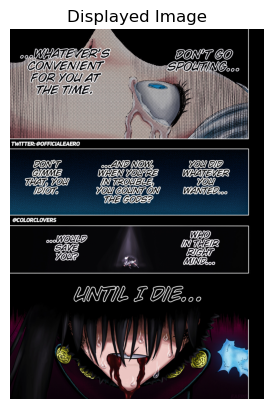

In [23]:
# Load the image
image1 = cv2.imread(os.path.join('./manga_dataset/colored/',colored_files[0]))

# OpenCV loads images in BGR format by default. Convert it to RGB format.
image_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Use matplotlib to display the image
plt.imshow(image_rgb)
plt.title('Displayed Image')
plt.axis('off')  # Hide the axis
plt.show()


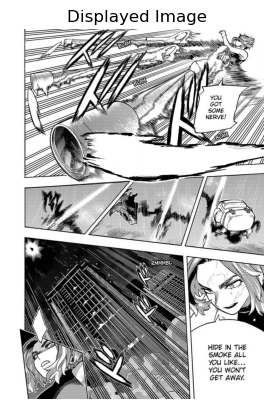

In [24]:
# Load the image
image2 = cv2.imread(os.path.join('./manga_dataset/grayscale/',grayscale_files[0]))

# OpenCV loads images in BGR format by default. Convert it to RGB format.
image_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Use matplotlib to display the image
plt.imshow(image_rgb)
plt.title('Displayed Image')
plt.axis('off')  # Hide the axis
plt.show()


In [62]:
from collections import OrderedDict

import torch
from torch import nn, optim

from ignite.engine import *
from ignite.handlers import *
from ignite.metrics import *
from ignite.metrics.regression import *
from ignite.utils import *

# create default evaluator for doctests

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)

# create default optimizer for doctests

param_tensor = torch.zeros([1], requires_grad=True)
default_optimizer = torch.optim.SGD([param_tensor], lr=0.1)

# create default trainer for doctests
# as handlers could be attached to the trainer,
# each test must define his own trainer using `.. testsetup:`

def get_default_trainer():

    def train_step(engine, batch):
        return batch

    return Engine(train_step)

# create default model for doctests

default_model = nn.Sequential(OrderedDict([
    ('base', nn.Linear(1479, 2)),
    ('fc', nn.Linear(2, 1))
]))

manual_seed(666)

In [63]:
metric = FID(num_features=1, feature_extractor=default_model)
metric.attach(default_evaluator, "fid")
x = torch.tensor(image1,dtype=torch.float32).permute(2, 0, 1)
y = torch.tensor(image2,dtype=torch.float32).permute(2, 0, 1)
m = nn.ZeroPad2d((695, 0, 1015, 0))
y = m(y)

state = default_evaluator.run([[x, y]])
state


Current run is terminating due to exception: feature_extractor output must be a tensor of dim 2, got: 3
Engine run is terminating due to exception: feature_extractor output must be a tensor of dim 2, got: 3


ValueError: feature_extractor output must be a tensor of dim 2, got: 3

In [60]:
print(state.metrics["fid"])

AttributeError: 'NoneType' object has no attribute 'metrics'

In [54]:
print(x.shape)
print(y.shape)

torch.Size([3, 2160, 1479])
torch.Size([3, 2160, 1479])


In [50]:
#m = nn.ZeroPad2d((2))
# # padding_left, 
# padding_right, 
# padding_top, 
# padding_bottom)
input = torch.randn(3, 1145, 784)

# using different paddings for different sides

m(input)
print(input.shape)
print(m(input).shape)

torch.Size([3, 1145, 784])
torch.Size([3, 2160, 1474])


In [ ]:
# shuffle the dataset
temp = list(zip(colored_files, grayscale_files))

random.shuffle(temp)
res1, res2 = zip(*temp)

# res1 and res2 come out as tuples, and so must be converted to lists.
colored, grayscale = list(res1), list(res2)

print(colored[0:5])
print(grayscale[0:5])

['blackclover_cl408.png', 'onepiece_cl1056.png', 'onepiece_cl24.png', 'onepiece_cl876.png', 'bukonohero_cl717.png']
['onepiece_bw1960.png', 'onepiece_bw544.png', 'blackclover_bw320.png', 'onepiece_bw920.png', 'onepiece_bw1271.png']


In [ ]:
#split the dataset 0.8 for training

#training colored
train_cl = []
for i in tqdm(range(int(0.0*len(colored)), int(0.8*len(colored)))):
    train_cl.append(colored[i])
    
#testing grayscale
test_cl = []
for i in tqdm(range(int(0.8*len(colored)), int(1.0*len(colored)))):
    test_cl.append(colored[i])

100%|██████████| 716/716 [00:00<00:00, 1634796.77it/s]


In [ ]:
print(train_cl[-3:None])
print(test_cl[0:3])

['blackclover_cl701.png', 'blackclover_cl652.png', 'onepiece_cl339.png']
['onepiece_cl604.png', 'bukonohero_cl160.png', 'onepiece_cl1238.png']


In [ ]:
#training grayscale
train_bw = []
for i in tqdm(range(int(0.0*len(grayscale)), int(0.8*len(grayscale)))):
    train_bw.append(grayscale[i])
    
#testing grayscale
test_bw = []
for i in tqdm(range(int(0.8*len(grayscale)), int(1.0*len(grayscale)))):
    test_bw.append(grayscale[i])

100%|██████████| 716/716 [00:00<00:00, 2119351.92it/s]


In [ ]:
print(train_bw[-3:None])
print(test_bw[0:3])

['blackclover_bw848.png', 'bukonohero_bw961.png', 'onepiece_bw9.png']
['bukonohero_bw583.png', 'onepiece_bw810.png', 'onepiece_bw1634.png']


In [ ]:
def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

In [ ]:
# copy the train dataset to unpaired image dataset path
for i in tqdm(range(len(train_cl)), 'copying train colored and grayscale'):
    # Source path 
    src1 = find(str(train_bw[i]), './manga_dataset/grayscale/')
    src2 = find(str(train_cl[i]), './manga_dataset/colored/')

    # Destination path 
    dest1 = 'manga_dataset/train_test/trainA/'
    dest2 = 'manga_dataset/train_test/trainB/'

    # Copy the content of source to destination 
    shutil.copy(src1, dest1) 
    shutil.copy(src2, dest2)  

copying train colored and grayscale: 100%|██████████| 2861/2861 [00:16<00:00, 172.55it/s]


In [ ]:
# copy the test dataset to unpaired image dataset path
for i in tqdm(range(len(test_cl)), 'copying test colored and grayscale'):
    # Source path 
    src1 = find(str(test_bw[i]), './manga_dataset/grayscale/')
    src2 = find(str(test_cl[i]), './manga_dataset/colored/')

    # Destination path 
    dest1 = 'manga_dataset/train_test/testA/'
    dest2 = 'manga_dataset/train_test/testB/'

    # Copy the content of source to destination 
    shutil.copy(src1, dest1) 
    shutil.copy(src2, dest2) 

copying test colored and grayscale: 100%|██████████| 716/716 [00:04<00:00, 172.69it/s]


# Install MMGeneration

In [2]:
# Check Pytorch installation
import torch
print(torch.__version__)

2.3.0


In [9]:
!conda install pytorch==1.6.0 torchvision==0.7.0 cudatoolkit=10.1 -c pytorch -y

# install the latest mmcv
# pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/{cu_version}/{torch_version}/index.html
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.6.0/index.html

# install mmgeneration
!rm -rf mmgeneration
!git clone https://github.com/open-mmlab/mmgeneration.git
%cd mmgeneration
!pip install -r requirements.txt
!pip install -v -e .

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "HEAD /conda-forge/noarch/repodata.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "HEAD /tczhangzhi/noarch/repodata.json HTTP/1.1" 200 0
Channels:
 - pytorch
 - defaults
 - conda-forge
 - tczhangzhi
Platform: osx-arm64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
| DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /tczhangzhi/noarch/repodata.json HTTP/1.1" 304 0
/ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpo

In [10]:
from mmcv import collect_env
collect_env()

{'sys.platform': 'darwin',
 'Python': '3.11.7 | packaged by conda-forge | (main, Dec 23 2023, 14:38:07) [Clang 16.0.6 ]',
 'CUDA available': False,
 'GCC': 'Apple clang version 15.0.0 (clang-1500.3.9.4)',
 'PyTorch': '2.3.0',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 4.2\n  - C++ Version: 201703\n  - clang 14.0.3\n  - LAPACK is enabled (usually provided by MKL)\n  - NNPACK is enabled\n  - CPU capability usage: NO AVX\n  - Build settings: BLAS_INFO=accelerate, BUILD_TYPE=Release, CXX_COMPILER=/Applications/Xcode_14.3.1.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/clang++, CXX_FLAGS= -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -DNDEBUG -DUSE_KINETO -DLIBKINETO_NOCUPTI -DLIBKINETO_NOROCTRACER -DUSE_PYTORCH_QNNPACK -DUSE_XNNPACK -DUSE_PYTORCH_METAL_EXPORT -DSYMBOLICATE_MOBILE_DEBUG_HANDLE -DUSE_COREML_DELEGATE -O2 -fPIC -Wall -Wextra -Werror=return-type -Werror=non-virtual-dtor -Werror=braced-scalar-init -Werror=range-loop-construct -Werror=bool-op

In [11]:
# Check MMDetection installation
import mmgen
print(mmgen.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

0.7.3
not available
clang 15.0.0


# Start training

In [12]:
# download pre-trained cyclegan model in winter2summer dataset
import wget

url = 'https://download.openmmlab.com/mmgen/cyclegan/refactor/cyclegan_lsgan_resnet_in_1x1_246200_summer2winter_convert-bgr_20210902_165932-fcf08dc1.pth'
wget.download(url, out='../')

'..//cyclegan_lsgan_resnet_in_1x1_246200_summer2winter_convert-bgr_20210902_165932-fcf08dc1 (1).pth'

In [17]:
%%writefile configs/cyclegan/cyclegan_lsgan_resnet_in_summer2winter_b1x1_250k.py

_base_ = [
    '../_base_/models/cyclegan/cyclegan_lsgan_resnet.py',
    '../_base_/datasets/unpaired_imgs_256x256.py',
    '../_base_/default_runtime.py'
]

domain_a = 'grayscale'
domain_b = 'colored'
model = dict(
    default_domain=domain_b,
    reachable_domains=[domain_a, domain_b],
    related_domains=[domain_a, domain_b],
    gen_auxiliary_loss=[
        dict(
            type='L1Loss',
            loss_weight=10.0,
            loss_name='cycle_loss',
            data_info=dict(
                pred=f'cycle_{domain_a}', target=f'real_{domain_a}'),
            reduction='mean'),
        dict(
            type='L1Loss',
            loss_weight=10.0,
            loss_name='cycle_loss',
            data_info=dict(
                pred=f'cycle_{domain_b}',
                target=f'real_{domain_b}',
            ),
            reduction='mean'),
        dict(
            type='L1Loss',
            loss_weight=0.5,
            loss_name='id_loss',
            data_info=dict(
                pred=f'identity_{domain_a}', target=f'real_{domain_a}'),
            reduction='mean'),
        dict(
            type='L1Loss',
            loss_weight=0.5,
            loss_name='id_loss',
            data_info=dict(
                pred=f'identity_{domain_b}', target=f'real_{domain_b}'),
            reduction='mean')
    ])
dataroot = '/Users/leo/Desktop/Manga-Colorization/manga_dataset/train_test/'
train_pipeline = [
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key=f'img_{domain_a}',
        flag='color'),
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key=f'img_{domain_b}',
        flag='color'),
    dict(
        type='Resize',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        scale=(256, 368),
        interpolation='bicubic'),
    dict(
        type='Crop',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        crop_size=(368, 256),
        random_crop=True),
    dict(type='Flip', keys=[f'img_{domain_a}'], direction='horizontal'),
    dict(type='Flip', keys=[f'img_{domain_b}'], direction='horizontal'),
    dict(type='RescaleToZeroOne', keys=[f'img_{domain_a}', f'img_{domain_b}']),
    dict(
        type='Normalize',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        to_rgb=False,
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]),
    dict(type='ImageToTensor', keys=[f'img_{domain_a}', f'img_{domain_b}']),
    dict(
        type='Collect',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        meta_keys=[f'img_{domain_a}_path', f'img_{domain_b}_path'])
]

test_pipeline = [
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key=f'img_{domain_a}',
        flag='color'),
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key=f'img_{domain_b}',
        flag='color'),
    dict(
        type='Resize',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        scale=(256, 368),
        interpolation='bicubic'),
    dict(type='RescaleToZeroOne', keys=[f'img_{domain_a}', f'img_{domain_b}']),
    dict(
        type='Normalize',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        to_rgb=False,
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]),
    dict(type='ImageToTensor', keys=[f'img_{domain_a}', f'img_{domain_b}']),
    dict(
        type='Collect',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        meta_keys=[f'img_{domain_a}_path', f'img_{domain_b}_path'])
]

data = dict(
    train=dict(
        dataroot=dataroot,
        pipeline=train_pipeline,
        domain_a=domain_a,
        domain_b=domain_b),
    val=dict(
        dataroot=dataroot,
        domain_a=domain_a,
        domain_b=domain_b,
        pipeline=test_pipeline),
    test=dict(
        dataroot=dataroot,
        domain_a=domain_a,
        domain_b=domain_b,
        pipeline=test_pipeline))

optimizer = dict(
    generators=dict(type='Adam', lr=0.0002, betas=(0.5, 0.999)),
    discriminators=dict(type='Adam', lr=0.0002, betas=(0.5, 0.999)))

# learning policy
lr_config = dict(
    policy='Linear', by_epoch=False, target_lr=0, start=125000, interval=1250)

checkpoint_config = dict(interval=5000, save_optimizer=True, by_epoch=False)
custom_hooks = [
    dict(
        type='MMGenVisualizationHook',
        output_dir='training_samples',
        res_name_list=[f'fake_{domain_a}', f'fake_{domain_b}'],
        interval=5000)
]

runner = None
use_ddp_wrapper = True
total_iters = 250000
load_from = '../cyclegan_lsgan_resnet_in_1x1_246200_summer2winter_convert-bgr_20210902_165932-fcf08dc1.pth'
# resume_from = './work_dirs/cyclegan_bw2cl/ckpt/cyclegan_bw2cl/iter_55000.pth'
workflow = [('train', 1)]
exp_name = 'cyclegan_bw2cl'
work_dir = f'./work_dirs/{exp_name}'
# testA: 716, testB:716
num_images = 716
metrics = dict(
    FID=dict(type='FID', num_images=num_images, image_shape=(3, 368, 256)),
    IS=dict(
        type='IS',
        num_images=num_images,
        image_shape=(3, 368, 256),
        inception_args=dict(type='pytorch')))

evaluation = dict(
    type='TranslationEvalHook',
    target_domain=domain_b,
    interval=5000,
    metrics=[
        dict(type='FID', num_images=num_images, bgr2rgb=True),
        dict(
            type='IS',
            num_images=num_images,
            inception_args=dict(type='pytorch'))
    ],
    best_metric=['fid', 'is'])

Overwriting configs/cyclegan/cyclegan_lsgan_resnet_in_summer2winter_b1x1_250k.py


In [18]:
!python tools/train.py configs/cyclegan/cyclegan_lsgan_resnet_in_summer2winter_b1x1_250k.py --work-dir ./work_dirs/cyclegan_bw2cl --no-validate

/Users/leo/anaconda3/lib/python3.11/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/Users/leo/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/leo/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/leo/anaconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E6933B13-F4A0-3821-8466-03F22A3B3739> /Users/leo/anaconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image

In [2]:
import os

In [3]:
len(os.listdir('/Users/leo/Desktop/Manga-Colorization/training_samples'))

32

In [4]:
len(os.listdir('/Users/leo/Desktop/Manga-Colorization/weight'))

31